## Dependencias

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf 

from functools import reduce

from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

from itertools import combinations

cf.go_offline()

## Lectura de datos

In [5]:
df = pd.read_excel('../data/Cuestionario Lúdico (Respuestas).xlsx')

In [6]:
df.head()

,Marca temporal,Edad (años entero),Signo del zodiaco,Signo del zodiaco chino,Sexo (biológico),"Tamaño del zapato (22,23,24,etc)",Tiempo promedio diario que pasan en redes sociales (minutos),¿Tienes pareja?,¿Te gusta el reggaeton?,¿Te gusta el futbol?,¿Usas Tiktok?,Estatura (cms),Peso (kg)
0,2023-03-10 18:00:02.133,22,Acuario,Serpiente,Hombre,25.0,180,Sí,Sí,Sí,Sí,172,62.0
1,2023-03-10 18:00:52.170,21,Aries,Serpiente,Mujer,24.0,240,Sí,Sí,No,Sí,160,60.0
2,2023-03-10 18:01:37.361,21,Libra,Serpiente,Hombre,28.0,90,No,Sí,Sí,No,172,85.0
3,2023-03-10 18:01:44.124,22,Virgo,Dragón,Mujer,24.0,180,No,Sí,No,Sí,158,62.0
4,2023-03-10 18:01:49.099,21,Libra,Conejo,Hombre,29.0,120,Sí,Sí,Sí,Sí,181,89.0


## Categorización de variables

In [7]:
df.columns

Index(['Marca temporal', 'Edad (años entero)', 'Signo del zodiaco',
       'Signo del zodiaco chino', 'Sexo (biológico)',
       'Tamaño del zapato (22,23,24,etc)',
       'Tiempo promedio diario que pasan en redes sociales (minutos)',
       '¿Tienes pareja?', '¿Te gusta el reggaeton?', '¿Te gusta el futbol?',
       '¿Usas Tiktok?', 'Estatura (cms)', 'Peso (kg)'],
      dtype='object')

In [8]:
varc = ['Edad (años entero)','Tamaño del zapato (22,23,24,etc)',
        'Tiempo promedio diario que pasan en redes sociales (minutos)','Estatura (cms)', 'Peso (kg)']
vard = ['Signo del zodiaco',
       'Signo del zodiaco chino']
vart = ['Sexo (biológico)','¿Tienes pareja?', '¿Te gusta el reggaeton?', '¿Te gusta el futbol?',
       '¿Usas Tiktok?']

## Visualización de datos

In [13]:
comb = combinations(varc,3)


for c in comb:
    c = tuple(c)
    df[varc].iplot(kind='scatter3d',mode='markers',x=c[0],y=c[1],z=c[2],xTitle=c[0],yTitle=c[1],zTitle=c[2]) 



## Partición de datos

In [16]:
train,test = train_test_split(df,train_size=0.7)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

## Reducción de dimensionalidad

In [19]:
pipe = make_pipeline(StandardScaler(),PCA(n_components=3),MinMaxScaler())
pipe.fit(train[varc])
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())
Xp = pd.DataFrame(pipe.transform(train[varc]),columns=['PC1','PC2','PC3'])
Xp.head()

[0.55000226 0.76017953 0.92726407]


,PC1,PC2,PC3
0,0.611821,0.306235,2.112130e-01
1,0.335642,0.640978,6.582425e-01
2,0.481664,0.349907,1.709307e-01
3,0.153454,0.288467,2.775558e-16
4,0.376135,0.934741,2.811624e-01


array([[<Axes: title={'center': 'Edad (años entero)'}>,
        <Axes: title={'center': 'Tamaño del zapato (22,23,24,etc)'}>],
       [<Axes: title={'center': 'Tiempo promedio diario que pasan en redes sociales (minutos)'}>,
        <Axes: title={'center': 'Estatura (cms)'}>],
       [<Axes: title={'center': 'Peso (kg)'}>, <Axes: >]], dtype=object)

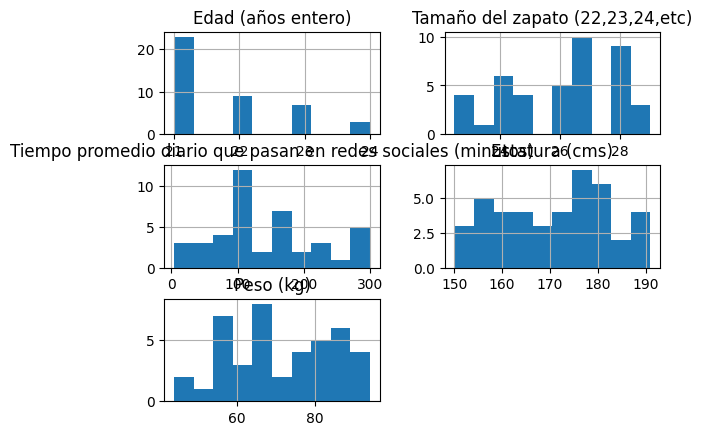

In [21]:
train[varc].hist()

array([[<Axes: title={'center': 'PC1'}>, <Axes: title={'center': 'PC2'}>],
       [<Axes: title={'center': 'PC3'}>, <Axes: >]], dtype=object)

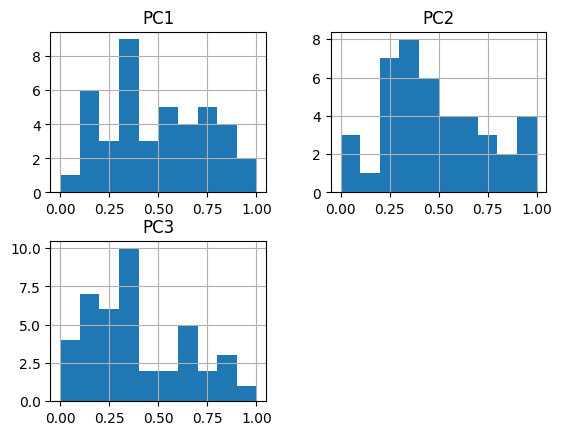

In [20]:
Xp.hist()

## Entrenar clasificadores lineales

In [23]:
vart

['Sexo (biológico)',
 '¿Tienes pareja?',
 '¿Te gusta el reggaeton?',
 '¿Te gusta el futbol?',
 '¿Usas Tiktok?']

In [94]:
target = vart[-1]

In [95]:
Xp[target] = train[target]

In [96]:
Xp.iplot(kind='scatter3d',mode='markers',x='PC1',y='PC2',z='PC3',xTitle='PC1',yTitle='PC2',zTitle='PC3',categories=target)

In [97]:
mod = Perceptron()
mod.fit(Xp[['PC1','PC2','PC3']],Xp[target])

valid = pd.DataFrame(pipe.transform(test[varc]),columns=['PC1','PC2','PC3'])

print({'train':accuracy_score(Xp[target],mod.predict(Xp[['PC1','PC2','PC3']])),
'test':accuracy_score(test[target],mod.predict(valid[['PC1','PC2','PC3']]))})

{'train': 0.40476190476190477, 'test': 0.3333333333333333}


In [98]:
mod = PassiveAggressiveClassifier()
mod.fit(Xp[['PC1','PC2','PC3']],Xp[target])

valid = pd.DataFrame(pipe.transform(test[varc]),columns=['PC1','PC2','PC3'])

print({'train':accuracy_score(Xp[target],mod.predict(Xp[['PC1','PC2','PC3']])),
'test':accuracy_score(test[target],mod.predict(valid[['PC1','PC2','PC3']]))})

{'train': 0.5, 'test': 0.4444444444444444}


In [102]:
mod = SVC()
mod.fit(Xp[['PC1','PC2','PC3']],Xp[target])

valid = pd.DataFrame(pipe.transform(test[varc]),columns=['PC1','PC2','PC3'])

print({'train':accuracy_score(Xp[target],mod.predict(Xp[['PC1','PC2','PC3']])),
'test':accuracy_score(test[target],mod.predict(valid[['PC1','PC2','PC3']]))})

{'train': 0.7380952380952381, 'test': 0.6111111111111112}


## Mejora con Hiperparámetros

In [100]:
hp = {'C':[0.1,1,10,100,1000],'kernel':['linear','rbf','poly'],'degree':[2,3,4,5,6]}
reduce(lambda x,y: x*y,[len(hp[k]) for k in hp])
mod = SVC()

In [101]:
grid = GridSearchCV(mod,hp,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
grid.fit(Xp[['PC1','PC2','PC3']],Xp[target])
mod = grid.best_estimator_
print(grid.best_params_)

mod.fit(Xp[['PC1','PC2','PC3']],Xp[target])
print({'train':accuracy_score(Xp[target],mod.predict(Xp[['PC1','PC2','PC3']])),
'test':accuracy_score(test[target],mod.predict(valid[['PC1','PC2','PC3']]))})

Fitting 5 folds for each of 75 candidates, totalling 375 fits
{'C': 100, 'degree': 5, 'kernel': 'poly'}
{'train': 0.8571428571428571, 'test': 0.5555555555555556}


In [103]:
profe = pd.Series(dict(zip(varc, [36,  30,  180,  184,  59])))
profe = pd.DataFrame(profe).T

mod.predict(pd.DataFrame(pipe.transform(profe),columns=['PC1','PC2','PC3']))

array(['Sí'], dtype=object)

## Importancia de las variables

In [104]:
sk = SelectKBest(k=len(varc))
sk.fit(train[varc],train[target])
pd.DataFrame({'var':varc,'score':sk.scores_}).sort_values('score',ascending=False).iplot(kind='bar',x='var',y='score')


In [105]:
train[varc+[target]].groupby(target).mean().T

¿Usas Tiktok?,No,Sí
Edad (años entero),21.529412,21.92
"Tamaño del zapato (22,23,24,etc)",26.205882,26.06
Tiempo promedio diario que pasan en redes sociales (minutos),123.529412,167.64
Estatura (cms),169.882353,171.16
Peso (kg),66.717647,72.72
